<a href="https://colab.research.google.com/github/alexanderportilla96/Sy2025II/blob/main/Copia_de_solucion_parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PARCIAL 1 SYS**

## **Arthur Alexander Portilla**
# 1088596640


---


## Las Librer√≠as para Procesamiento de Se√±ales

| Librer√≠a | Lo Mejor / Uso Crucial |
| :--- | :--- |
| **NumPy** | Es el **fundamento**; permite el **manejo r√°pido y vectorial de se√±ales** (arreglos) y realiza c√°lculos esenciales como la **FFT** (Transformada R√°pida de Fourier). |
| **SymPy** | Excelente para el **an√°lisis simb√≥lico** (algebraico) de ecuaciones. √ötil para **modelar sistemas y derivadas/integrales** antes de la implementaci√≥n num√©rica. |
| **Matplotlib.pyplot** | El est√°ndar para la **visualizaci√≥n**. Permite **graficar se√±ales** en el dominio del tiempo y la frecuencia (espectros). |
| **scipy.signal.convolve** | Herramienta clave para la **aplicaci√≥n de filtros**. La convoluci√≥n es la operaci√≥n que define c√≥mo un filtro interact√∫a con una se√±al. |
| **scipy.spatial.distance.cdist** | Fundamental en **cuantizaci√≥n** y an√°lisis de datos. Calcula **distancias** para encontrar el nivel m√°s cercano en procesos de discretizaci√≥n. |



En resumen: **NumPy** es el motor para los datos, **Matplotlib** es el ojo para la visualizaci√≥n, y **SciPy** (con `signal` y `spatial`) proporciona las herramientas avanzadas para **filtrar y cuantizar** la se√±al.





# Ejercicio 1

La distancia $d(x_1, x_2)$ entre dos se√±ales peri√≥dicas $x_1(t)$ y $x_2(t)$ se define como la ra√≠z cuadrada de la energ√≠a promedio de la diferencia de las se√±ales sobre un periodo, tambi√©n conocida como la distancia cuadr√°tica media. Matem√°ticamente, se expresa como:

$$d^2(x_1, x_2) = P_{\overline{x_1-x_2}} = \lim_{T\to\infty} \frac{1}{T} \int_{-T/2}^{T/2} |x_1(t) - x_2(t)|^2 dt$$

Si las se√±ales son arm√≥nicos complejos de una misma frecuencia fundamental $w_0$, es decir $x_1(t) = A e^{-j n w_0 t}$ y $x_2(t) = B e^{j m w_0 t}$, la distancia se puede calcular de forma anal√≠tica.



Distancia anal√≠tica = 5.0000
Distancia num√©rica  = 5.0000
Distancia anal√≠tica = 5.0000
Distancia num√©rica  = 5.0000


/tmp/ipython-input-2100535120.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  d2_num = np.trapz(np.abs(diff)**2, t) / T
/tmp/ipython-input-2100535120.py:42: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  d2_num = np.trapz(np.abs(diff)**2, t) / T


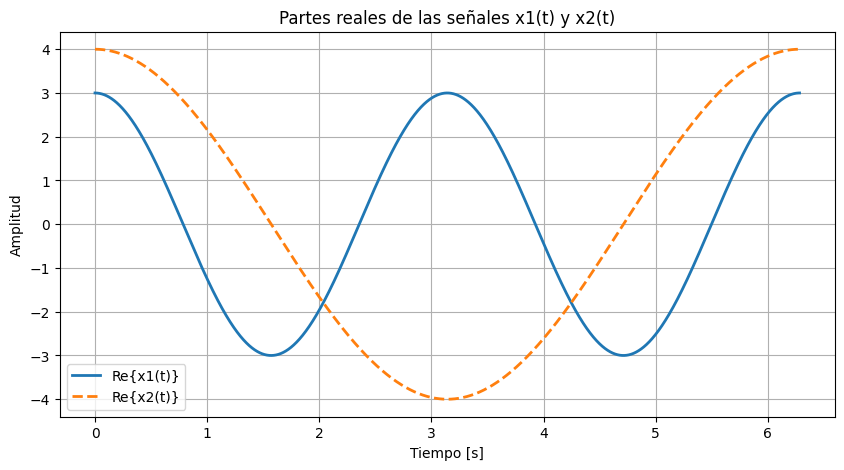

In [22]:
# Importamos librer√≠as necesarias
import numpy as np
import matplotlib.pyplot as plt

# Par√°metros de las se√±ales
A = 3          # Amplitud de x1(t)
B = 4          # Amplitud de x2(t)
n = 2          # Arm√≥nico de x1(t)
m = 1          # Arm√≥nico de x2(t)
T = 2 * np.pi  # Periodo fundamental (puede ser cualquier valor positivo)
w0 = 2 * np.pi / T  # Frecuencia angular fundamental

# Vector de tiempo: un periodo completo
t = np.linspace(0, T, 5000)

# Definimos las se√±ales complejas
x1 = A * np.exp(-1j * n * w0 * t)
x2 = B * np.exp(1j * m * w0 * t)

# Calculamos la diferencia
diff = x1 - x2


# Distancia num√©rica mediante integraci√≥n (energ√≠a promedio)
d2_num = np.trapz(np.abs(diff)**2, t) / T
d_num = np.sqrt(d2_num)

# Distancia anal√≠tica seg√∫n el caso
if n + m == 0:
    d_anal = abs(A - B)
else:
    d_anal = np.sqrt(A**2 + B**2)

# Mostramos resultados
print(f"Distancia anal√≠tica = {d_anal:.4f}")
print(f"Distancia num√©rica  = {d_num:.4f}")




# Distancia num√©rica mediante integraci√≥n (energ√≠a promedio)
d2_num = np.trapz(np.abs(diff)**2, t) / T
d_num = np.sqrt(d2_num)

# Distancia anal√≠tica seg√∫n el caso
if n + m == 0:
    d_anal = abs(A - B)
else:
    d_anal = np.sqrt(A**2 + B**2)

# Mostramos resultados
print(f"Distancia anal√≠tica = {d_anal:.4f}")
print(f"Distancia num√©rica  = {d_num:.4f}")




# Parte real de las se√±ales (para visualizarlas en el tiempo)
plt.figure(figsize=(10,5))
plt.plot(t, np.real(x1), label='Re{x1(t)}', linewidth=2)
plt.plot(t, np.real(x2), label='Re{x2(t)}', linewidth=2, linestyle='--')
plt.title('Partes reales de las se√±ales x1(t) y x2(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()




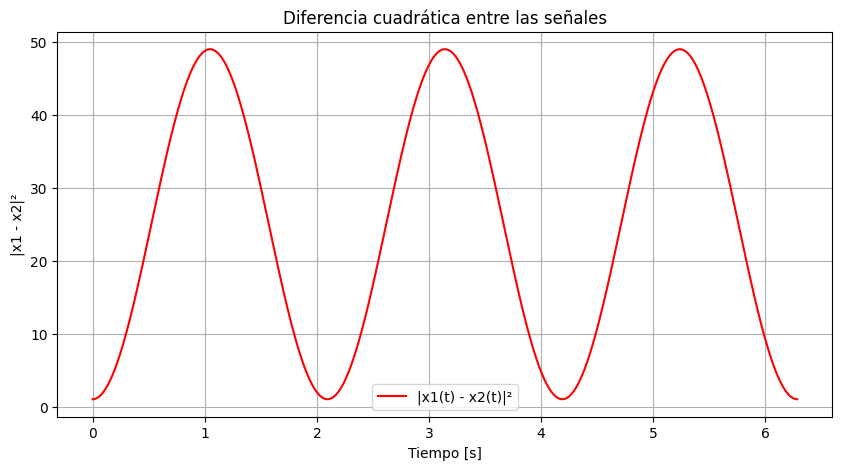

In [23]:
# Magnitud cuadr√°tica de la diferencia
plt.figure(figsize=(10,5))
plt.plot(t, np.abs(diff)**2, color='red', label='|x1(t) - x2(t)|¬≤')
plt.title('Diferencia cuadr√°tica entre las se√±ales')
plt.xlabel('Tiempo [s]')
plt.ylabel('|x1 - x2|¬≤')
plt.legend()
plt.grid(True)
plt.show()


---
# **Ejercicio 2.**
Encuentre la senal en tiempo discreto al utilizar un conversor
analogo digital con frecuencia de muestreo de 5kHz y 4 bits
de capacidad de representacion, aplicado a la se√±al continua:

x(t) = 3 cos(1000œÄt) + 5 sin(3000œÄt) + 10 cos(11000œÄt).

Realizar la simulacion del proceso de discretizacion (incluyendo al menos tres periodos de x(t)). En caso de que la discretizacion no sea apropiada, dise√±e implemente un conversor adecuado para la senal estudiada.


Paso 1. Definir la se√±al continua
ùë•
(
ùë°
)
x(t)



La se√±al tiene tres componentes:

ùëì1=500

Hz

ùëì
2
=1500Hz

ùëì
3=5500Hz

Por lo tanto:


x(t)=3cos(2œÄ‚ãÖ500t)+5sin(2œÄ‚ãÖ1500t)+10cos(2œÄ‚ãÖ5500t)



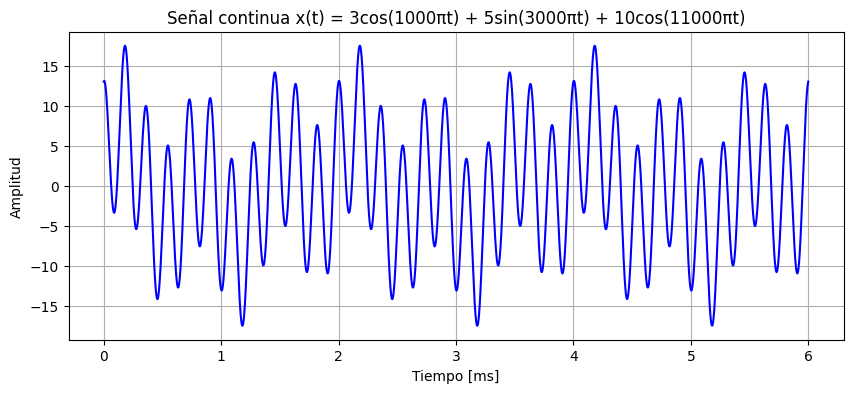

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Frecuencias y amplitudes
A1, f1 = 3.0, 500.0
A2, f2 = 5.0, 1500.0
A3, f3 = 10.0, 5500.0

# Periodo fundamental (m√∫ltiplo de 500 Hz)
T0 = 1 / 500
t = np.linspace(0, 3*T0, 5000)  # tiempo continuo (alta resoluci√≥n)

# Se√±al continua x(t)
x_cont = A1*np.cos(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.cos(2*np.pi*f3*t)

# Gr√°fica de la se√±al continua
plt.figure(figsize=(10,4))
plt.plot(t*1000, x_cont, color='blue')
plt.title("Se√±al continua x(t) = 3cos(1000œÄt) + 5sin(3000œÄt) + 10cos(11000œÄt)")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

#La se√±al total es la superposici√≥n de esas tres ondas, y por eso se ve ‚Äúrugosa‚Äù (las altas frecuencias producen peque√±as ondulaciones sobre la se√±al base).


Muestreo a f_s= 5kHz
Concepto

	- Frecuencia de muestreo: f_s=5000Hz ‚Üí T_s=1/5000=0.0002s

	- El criterio de Nyquist dice: f_s > 2f_max
       f_max =5500=Hz
	     2f_max =11000>5000‚ùå ‚Üí habr√° aliasing.


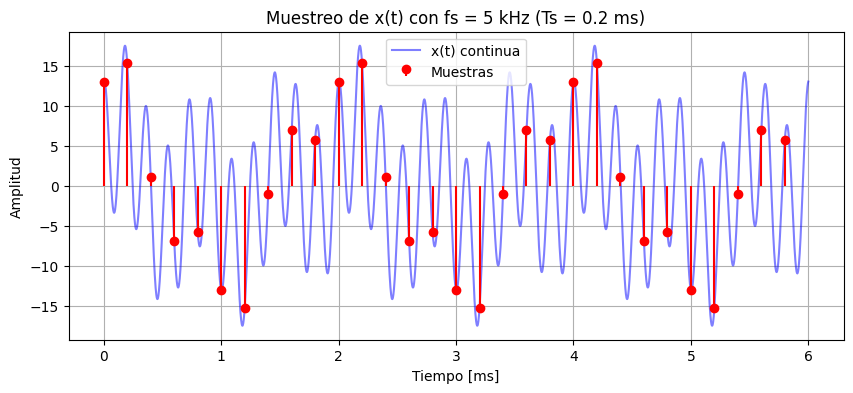

In [25]:
# Frecuencia de muestreo
fs = 5000
Ts = 1 / fs
t_samp = np.arange(0, 3*T0, Ts)

# Se√±al muestreada
x_samp = A1*np.cos(2*np.pi*f1*t_samp) + A2*np.sin(2*np.pi*f2*t_samp) + A3*np.cos(2*np.pi*f3*t_samp)

# Graficar muestreo
plt.figure(figsize=(10,4))
plt.plot(t*1000, x_cont, 'b', alpha=0.5, label="x(t) continua")
plt.stem(t_samp*1000, x_samp, linefmt='r-', markerfmt='ro', basefmt=" ", label="Muestras")
plt.title("Muestreo de x(t) con fs = 5 kHz (Ts = 0.2 ms)")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


	- La l√≠nea azul es la se√±al continua (referencia).
	- Los puntos rojos son los valores muestreados por el ADC.
	- Como f_3=5500Hz>f_s/2=2500Hz, la componente de alta frecuencia se pliega (alias) sobre la de 500 Hz.
	- Por eso, la secuencia muestreada parece una se√±al m√°s simple de baja frecuencia ‚Äî el alias hace que el contenido real de 5500 Hz se confunda con 500 Hz.

Verificaci√≥n del aliasing matem√°ticamente
Concepto
La componente de 5500 Hz se pliega a:

f_3^'= ‚à£f_3-f_s‚à£=‚à£5500-5000‚à£=500Hz

Entonces, dentro de las muestras:

3cos‚Å°(2œÄ‚ãÖ500t)+10cos‚Å°(2œÄ‚ãÖ5500t)‚áí (3+10)cos‚Å°(2œÄ‚ãÖ500t)

Es decir, se suman las amplitudes.




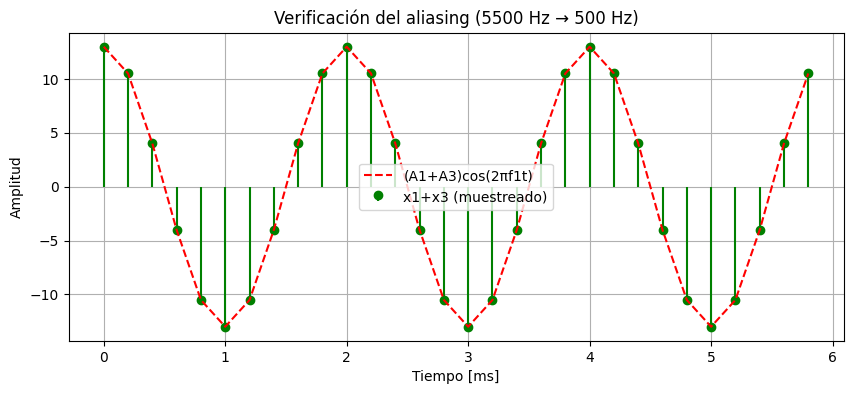

In [26]:
# Suma de las dos componentes que se pliegan
sum_13 = A1*np.cos(2*np.pi*f1*t_samp) + A3*np.cos(2*np.pi*f3*t_samp)
theoretical_sum = (A1 + A3) * np.cos(2*np.pi*f1*t_samp)

plt.figure(figsize=(10,4))
plt.stem(t_samp*1000, sum_13, linefmt='g-', markerfmt='go', basefmt=" ", label="x1+x3 (muestreado)")
plt.plot(t_samp*1000, theoretical_sum, 'r--', label="(A1+A3)cos(2œÄf1t)")
plt.title("Verificaci√≥n del aliasing (5500 Hz ‚Üí 500 Hz)")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


Los puntos verdes muestran la suma real de las componentes 500 Hz + 5500 Hz.

La l√≠nea roja discontinua es la onda equivalente de (A1+A3)cos‚Å°(2œÄf1t).

Se observa que coinciden perfectamente ‚Üí el alias es total: la componente de 5500 Hz ‚Äúse camufla‚Äù como otra de 500 Hz.


Cuantizaci√≥n (4 bits)

Un ADC de 4 bits ‚Üí 2^4=16niveles posibles.
Se define el rango del convertidor:

	V_ref =1.1‚ãÖmax‚Å°‚à£x[n]‚à£

	Paso de cuantizaci√≥n:
	Œî=(2V_ref )/16

	Cada muestra se redondea al m√∫ltiplo de Œî m√°s cercano.

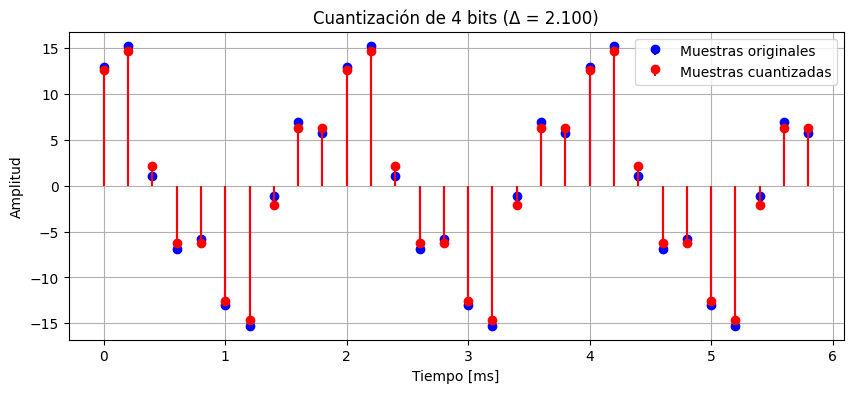

In [27]:
# Cuantizaci√≥n uniforme de 4 bits
L = 16
Vref = 1.1 * np.max(np.abs(x_samp))
Delta = 2*Vref / L

def quantize(x, Delta):
    return Delta * (np.floor(x/Delta + 0.5))

xq = quantize(x_samp, Delta)
error = x_samp - xq

plt.figure(figsize=(10,4))
plt.stem(t_samp*1000, x_samp, linefmt='b-', markerfmt='bo', basefmt=" ", label="Muestras originales")
plt.stem(t_samp*1000, xq, linefmt='r-', markerfmt='ro', basefmt=" ", label="Muestras cuantizadas")
plt.title("Cuantizaci√≥n de 4 bits (Œî = %.3f)" % Delta)
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


	Los puntos azules: muestras originales antes de cuantizar.
	Los puntos rojos: valores cuantizados (despu√©s del ADC).
	Se observa que los valores rojos est√°n discretizados en ‚Äúescalones‚Äù ‚Üí p√©rdida de precisi√≥n.
	Entre ambos hay un peque√±o error e[n]‚Üí ruido de cuantizaci√≥n.


Mejorar el conversor (dos opciones)


Dado que f_s=5kHz produce aliasing, hay dos soluciones:

Usar un filtro antialias que elimine la componente de 5500 Hz antes del ADC.

‚Üí Se pierde esa informaci√≥n, pero no hay aliasing.


Aumentar f_sa un valor mayor que 2f_max.
‚Üí Elegimos f_s=12kHz.


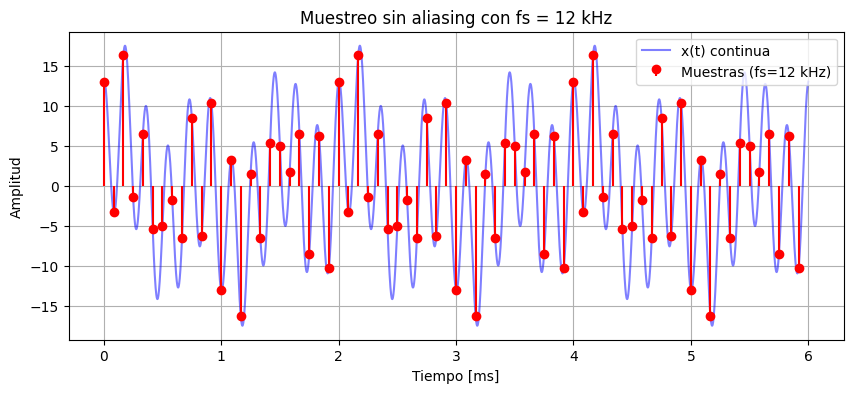

In [28]:
fs2 = 12000
Ts2 = 1 / fs2
t_samp2 = np.arange(0, 3*T0, Ts2)
x_samp2 = A1*np.cos(2*np.pi*f1*t_samp2) + A2*np.sin(2*np.pi*f2*t_samp2) + A3*np.cos(2*np.pi*f3*t_samp2)

plt.figure(figsize=(10,4))
plt.plot(t*1000, x_cont, 'b', alpha=0.5, label="x(t) continua")
plt.stem(t_samp2*1000, x_samp2, linefmt='r-', markerfmt='ro', basefmt=" ", label="Muestras (fs=12 kHz)")
plt.title("Muestreo sin aliasing con fs = 12 kHz")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


	Al aumentar la frecuencia de muestreo, los puntos rojos siguen la forma de la se√±al mucho m√°s de cerca.

	Ya no hay aliasing, porque f_s/2=6 kHz >5.5 kHz.
  
	La reconstrucci√≥n de la se√±al a partir de las muestras ser√≠a exacta si se aplica un filtro pasa-bajo ideal.


---
# Ejercicio 3

Sea $x''(t)$ la segunda derivada de la se√±al $x(t)$, donde $t \in [t_i, t_f]$.

Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular segun:

$$c_n = \frac{1}{[t_i, t_f]*n^2 \omega_0^2} d_n$$

donde $d_n$ son los coeficientes de la serie exponencial de Fourier de $x''(t)$, es decir:

$$d_n = \frac{1}{T} \int_{t_i}^{t_f} x''(t) e^{-j n \omega_0 t} dt$$

¬øComo se puede calculae los coeficientes a_n y b_n desde x''(t) en la serie trigonometrica de Fourier?.

Comparaci√≥n de coeficientes cn (directos vs desde x''):

n=-5 | c_n directo=-0.0030+0.0000j | c_n desde x''=-0.0002+0.0000j
n=-4 | c_n directo=-0.0030+0.0000j | c_n desde x''=-0.0004+0.0000j
n=-3 | c_n directo=-0.0030+0.0000j | c_n desde x''=-0.0007+0.0000j
n=-2 | c_n directo=-0.0030+1.0000j | c_n desde x''=-0.0015+1.0000j
n=-1 | c_n directo= 1.4970+0.0000j | c_n desde x''= 1.4941+0.0000j
n=+0 | c_n directo=-0.0030+0.0000j | c_n desde x''= 0.0000+0.0000j
n=+1 | c_n directo= 1.4970-0.0000j | c_n desde x''= 1.4941-0.0000j
n=+2 | c_n directo=-0.0030-1.0000j | c_n desde x''=-0.0015-1.0000j
n=+3 | c_n directo=-0.0030-0.0000j | c_n desde x''=-0.0007-0.0000j
n=+4 | c_n directo=-0.0030-0.0000j | c_n desde x''=-0.0004-0.0000j
n=+5 | c_n directo=-0.0030-0.0000j | c_n desde x''=-0.0002-0.0000j


/tmp/ipython-input-2903468287.py:38: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return (1/T) * np.trapz(x * np.exp(-1j * n * w0 * t), t)
/tmp/ipython-input-2903468287.py:48: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(x_2dot * np.exp(-1j * n * w0 * t), t)


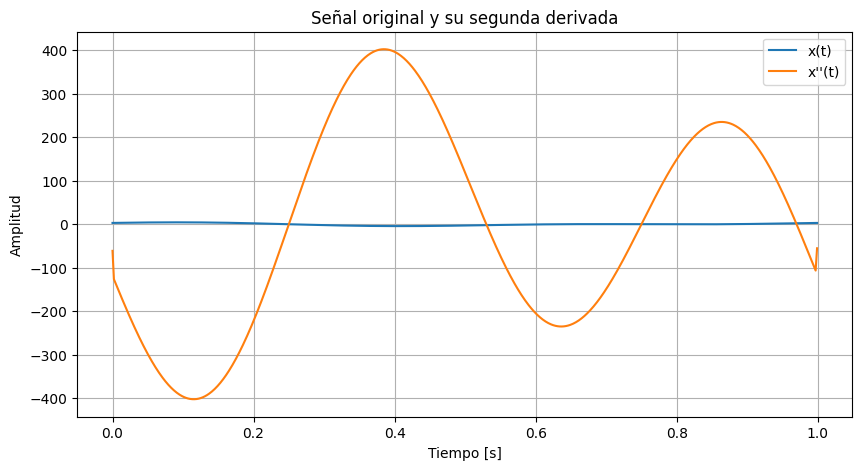

In [29]:
# ------------------------------------------------------------
# C√°lculo de coeficientes de Fourier a partir de x''(t)
# Autor: (tu nombre)
# Curso: Se√±ales y Sistemas
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Definimos la se√±al peri√≥dica x(t)
# ------------------------------------------------------------
# Elegimos un ejemplo sencillo y peri√≥dico:
# x(t) = 3*cos(œâ0*t) + 2*sin(2*œâ0*t)
# con œâ0 = 2œÄ/T y T = 1 s (frecuencia fundamental = 1 Hz)
# ------------------------------------------------------------
T = 1.0                    # periodo [s]
w0 = 2 * np.pi / T         # frecuencia angular fundamental [rad/s]
t = np.linspace(0, T, 1000, endpoint=False)  # 1000 puntos dentro de un periodo

x = 3 * np.cos(w0 * t) + 2 * np.sin(2 * w0 * t)  # se√±al original

# ------------------------------------------------------------
# 2. Calculamos la segunda derivada x''(t)
# ------------------------------------------------------------
# Derivamos num√©ricamente usando np.gradient dos veces
# (asumiendo muestreo uniforme)
# ------------------------------------------------------------
dt = t[1] - t[0]
x_2dot = np.gradient(np.gradient(x, dt), dt)

# ------------------------------------------------------------
# 3. Calculamos los coeficientes cn directos desde x(t)
# ------------------------------------------------------------
# F√≥rmula: c_n = (1/T) ‚à´ x(t) e^{-j n w0 t} dt
# ------------------------------------------------------------
def cn_direct(n):
    return (1/T) * np.trapz(x * np.exp(-1j * n * w0 * t), t)

# ------------------------------------------------------------
# 4. Calculamos los coeficientes cn desde x''(t)
# ------------------------------------------------------------
# F√≥rmula demostrada: c_n = -1/(T * n^2 * w0^2) * ‚à´ x''(t)e^{-j n w0 t} dt
# ------------------------------------------------------------
def cn_from_x2(n):
    if n == 0:
        return 0  # se evita divisi√≥n por cero
    integral = np.trapz(x_2dot * np.exp(-1j * n * w0 * t), t)
    return -(1/(T * (n**2) * (w0**2))) * integral

# ------------------------------------------------------------
# 5. Comparamos resultados para varios arm√≥nicos n
# ------------------------------------------------------------
N = 5  # n√∫mero de arm√≥nicos a evaluar
n_values = np.arange(-N, N+1)

print("Comparaci√≥n de coeficientes cn (directos vs desde x''):\n")
for n in n_values:
    c1 = cn_direct(n)
    c2 = cn_from_x2(n)
    print(f"n={n:+d} | c_n directo={c1.real:7.4f}{c1.imag:+7.4f}j | "
          f"c_n desde x''={c2.real:7.4f}{c2.imag:+7.4f}j")

# ------------------------------------------------------------
# 6. Visualizaci√≥n de la se√±al y su segunda derivada
# ------------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(t, x, label='x(t)')
plt.plot(t, x_2dot, label="x''(t)")
plt.title('Se√±al original y su segunda derivada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


---
# Ejercicio 4

 Encuentre el espectro de Fourier, su parte real,imaginaria, magnitud, fase y el error relativo para n‚àà{0, ¬±1, ¬±2, ¬±3, ¬±4, ¬±5}, a partir de x (t) para la se√±al x(t) en la Figura 1.

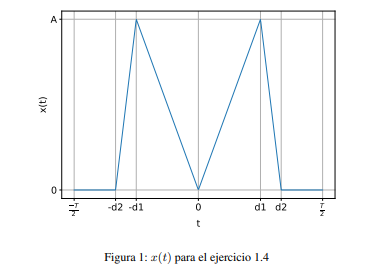

 Compruebe el espectro obtenido con la estimacion a partir de x(t). Presente las simulaciones de Python respectivas.

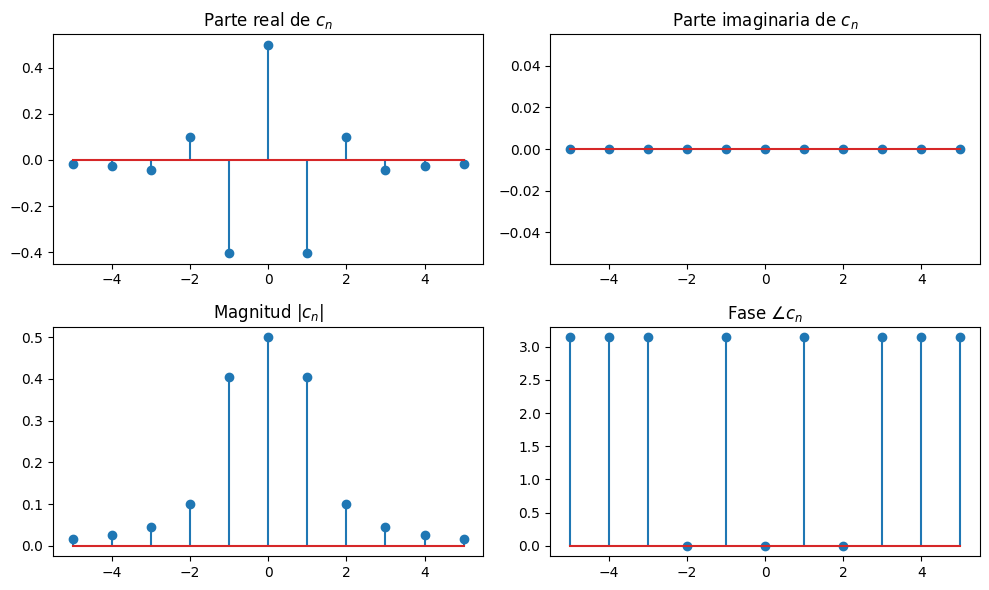

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Par√°metros
A, d1, d2, T = 1, 1, 2, 4
w0 = 2*np.pi/T

# Arm√≥nicos
n = np.arange(-5, 6)
c = np.zeros_like(n, dtype=complex)

# Calcular c_n
for i, ni in enumerate(n):
    if ni == 0:
        c[i] = A * d2 / T
    else:
        c[i] = (2/(ni**2 * np.pi**2)) * (np.cos(ni*np.pi) - 2*np.cos(ni*np.pi/2) - 1)

# Partes del espectro
real_part = np.real(c)
imag_part = np.imag(c)
mag = np.abs(c)
phase = np.angle(c)

# Gr√°ficas
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0,0].stem(n, real_part)
axs[0,0].set_title("Parte real de $c_n$")
axs[0,1].stem(n, imag_part)
axs[0,1].set_title("Parte imaginaria de $c_n$")
axs[1,0].stem(n, mag)
axs[1,0].set_title("Magnitud $|c_n|$")
axs[1,1].stem(n, phase)
axs[1,1].set_title("Fase ‚à†$c_n$")
plt.tight_layout()
plt.show()
